# **AP155 Lab Assignment**
## Module 5: Partial Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.



### Student Information

_Full Name (Last Name, First Name)_: GERALDINO, Simon Paul Andrew M.\
_Student No._: 2020-11068\
_Section_: THU-HX-1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: SIMON PAUL ANDREW M. GERALDINO**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/100

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**The Schrodinger equation and the Crank-Nicolson method**

_Refer to Exercise 9.8 in the Newman text._ In this problem, you will use the Crank-Nicolson method to solve the full time-dependent Schrodinger equation and hence develop a picture of how a wavefunction evolves over time.

Consider an electron (mass $M = 9.109 \times 10^{-31}$ kg) in a box of length $L = 10^{-8}$ m. Suppose that at time $t = 0$ the wavefunction of the electron has the form

$$ \psi(x,0) = \exp\left[-\frac{(x-x_0)^2}{2\sigma^2}\right]e^{i\kappa x},$$
where $x_0 = \frac{L}{2}$, $\sigma = 1 \times 10^{-10}$ m, $\kappa = 5 \times 10^{10} {\rm m}^{-1}$,  and $\psi = 0$ on the walls at $x = 0$ and $x = L$.

1. Perform a single step of the Crank-Nicolson method for this electron, calculating the vector $\psi(t)$ of values of the wavefunction, given the initial wavefunction above and using $N = 1000$ spatial slices with $a = L/N$. Your program will have to perform the following steps. First, given the vector $\psi(0)$ at $t = 0$, you will have to multiply by the matrix $\bf{B}$ to get a vector $\bf{v} = \bf{B}\psi$. Because of the tridiagonal form of $\bf{B}$, this is fairly simple. The $i$th component of $\bf{v}$ is given by
$$ v_i = b_1\psi_i + b_2(\psi_{i+1} + \psi_{i-1}).$$

   You will also have to choose a value for the time-step $h$. A reasonable choice is $h = 10^{-18}$ s. *(30 pts.)*

2. Second you will have to solve the linear system ${\bf Ax}= {\bf v}$ for $\bf{x}$, which gives you the new value of $\psi$. You could do this using a standard linear equation solver like the function $\tt solve$ in numpy's $\tt linalg$. *(20 pts.)*

3. Once you have the code in place to perform a single step of the calculation, extend your program to perform repeated steps and hence solve for $\psi$ at a sequence of times a separation $h$ apart. Note that the matrix $\bf A$ is independent of time, so it doesn't change from one step to another. You can set up the matrix just once and then keep on reusing it for every step. *(30 pts.)*

4. Make an animation of the solution by displaying the real part of the wavefunction at each time-step. You can use the function rate from the package visual to ensure a smooth frame-rate for your animation-- see Section 3.5 on page 117 of the Newman text.

   Run your animation for a while and describe what you see. Write a few sentences explaining in physics terms what is going on in the system. *(20 pts.)*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp

# Constants given by the problem
M = 9.109e-31         # Mass of an electron
L = 1e-8              # Length of the box
h = 1e-18             # Time-step
hbar = 1.0546e-34     # Reduced Planck's constant

# Variables seen in the wavefunction
x0 = L/2
sigma = 1e-10
kappa = 5e10

# This is the number of slices
N = 1000

# This is the distance between the grid points
a = L/N

In [ ]:
# Now, we set up the matrix elements to be used for the Crank-Nicholson equations
a1 = 1 + h*(1j*hbar)/(2*M*a**2)
a2 = -h*(1j*hbar)/(4*M*a**2)
b1 = 1 - h*(1j*hbar)/(2*M*a**2)
b2 = h*(1j*hbar)/(4*M*a**2)

# Setting up an array for the grid points
x = np.linspace(0, L, N+1)

# This function is for the initial wavefunction
def psi_t0(x):
    return np.exp((-(x-x0)**2)/(2*sigma**2))*np.exp(1j*kappa*x)

# We define the function from "banded.py" in the Newman textbook
def banded(Aa,va,up,down):

    A = np.copy(Aa)
    v = np.copy(va)
    N = len(v)

    # Gaussian elimination
    for m in range(N):

        # Normalization factor
        div = A[up,m]

        # Update the vector first
        v[m] /= div
        for k in range(1,down+1):
            if m+k<N:
                v[m+k] -= A[up+k,m]*v[m]

        # Now normalize and subtract the pivot row
        for i in range(up):
            j = m + up - i
            if j<N:
                A[i,j] /= div
                for k in range(1,down+1):
                    A[i+k,j] -= A[up+k,m]*A[i,j]
    # Backsubstitution
    for m in range(N-2,-1,-1):
        for i in range(up):
            j = m + up - i
            if j<N:
                v[m] -= A[i,j]*v[j]

    return v

# This creates the array "A"
A = np.empty([3,N],complex)

# These are the values for the nonzero elemenets in the tridiagonal matrix A

# For the elements on the "right" of the diagonal
A[0,:] = a2

# For the elements on the diagonal of the matrix
A[1,:] = a1

# For the elements on the "left" of the diagonal
A[2,:] = a2

# This creates the array for the wavefunction
psi = np.zeros(N+1,complex)

# This sets up the initial wavefunction to array "psi"
psi[:] = psi_t0(x)

# These are the boundary conditions for the wavefunction
psi[0] = 0
psi[N] = 0

# We calculate the vector v = B*psi
v = b1*psi[1:N] + b2*(psi[2:N+1] + psi[0:N-1])

# We can now solve the matrix with the form Ax = v
psi[1:N] = banded(A,v,1,1)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


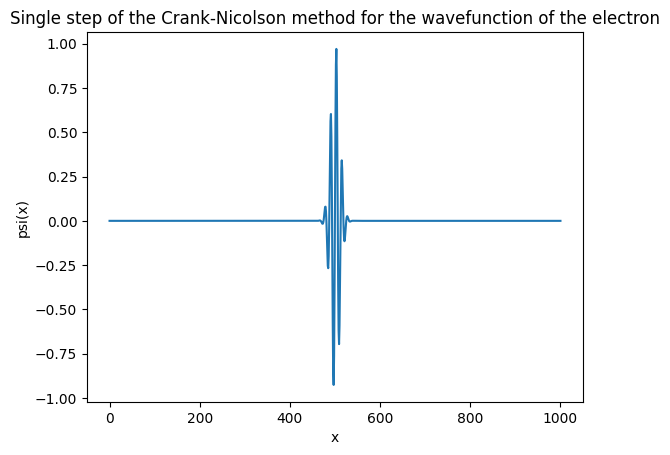

In [ ]:
# Now, to plot the wave function psi

# This creates the figures and axes
fig,ax = plt.subplots()

ax.plot(psi)
ax.set(title = 'Single step of the Crank-Nicolson method for the wavefunction of the electron',
       xlabel = 'x',
       ylabel = 'psi(x)')

# This plots the single step of wavefunction of the electron
plt.show()